In [1]:
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
df = pd.read_csv("spotify.csv")
print(df)

                    title            artist         top genre  year  bpm  \
0                Believer   Imagine Dragons       modern rock  2017  125   
1                 Perfect        Ed Sheeran               pop  2017   95   
2              goosebumps      Travis Scott               rap  2016  130   
3            Shape of You        Ed Sheeran               pop  2017   96   
4   Closer (feat. Halsey)  The Chainsmokers        electropop  2016   95   
..                    ...               ...               ...   ...  ...   
95              One Dance             Drake  canadian hip hop  2016  104   
96              Attention      Charlie Puth         dance pop  2017  100   
97             Me RehÃºso       Danny Ocean             latin  2016  105   
98          XO TOUR Llif3      Lil Uzi Vert       melodic rap  2017  155   
99                Tuesday       Burak Yeter     electro house  2016   99   

    energy  danceability  loudness  liveness  valence  duration_s  \
0       78        

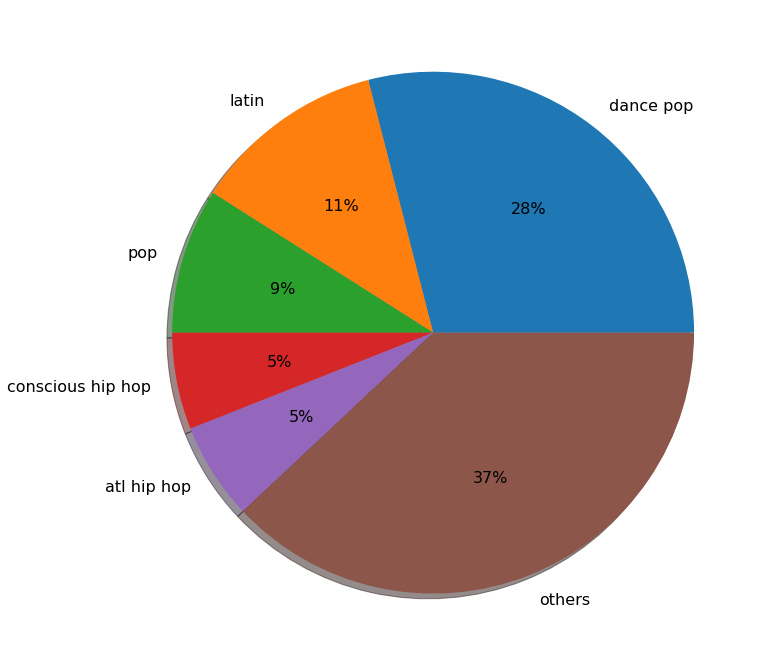

In [3]:
generos = df["top genre"].value_counts()
top_generos = generos.nlargest()
top_generos.loc["others"] = generos.loc[~generos.isin(top_generos)].sum()
top_generos.rename("").plot.pie(autopct="%i%%", figsize=(12, 12), fontsize=16, shadow=True)

[Text(0, 0.5, 'Genres')]

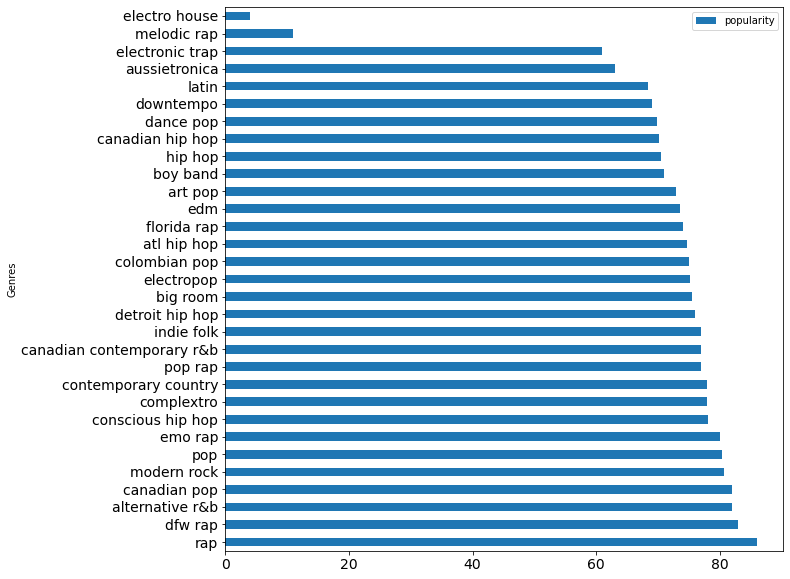

In [4]:
gen_pop = df.groupby("top genre").agg({"popularity": "mean"})
gen_pop = gen_pop.sort_values("popularity", ascending=False)
ax = gen_pop.plot.barh(figsize=(10, 10), fontsize=14)
ax.set(ylabel="Genres")

[Text(0, 0.5, 'Genres')]

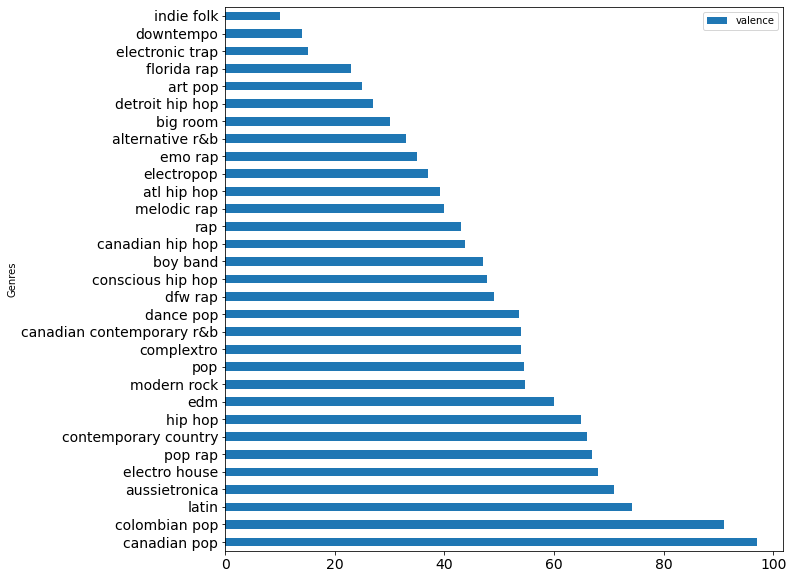

In [5]:
gen_val = df.groupby("top genre").agg({"valence": "mean"})
gen_val = gen_val.sort_values("valence", ascending=False)
ax = gen_val.plot.barh(figsize=(10, 10), fontsize=14)
ax.set(ylabel="Genres")

[Text(0, 0.5, 'Genres')]

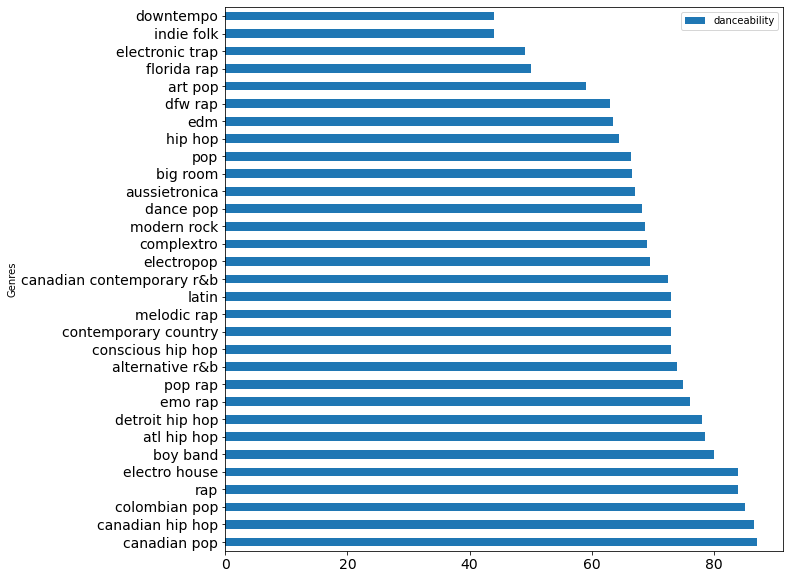

In [6]:
gen_dan = df.groupby("top genre").agg({"danceability": "mean"})
gen_dan = gen_dan.sort_values("danceability", ascending=False)
ax = gen_dan.plot.barh(figsize=(10, 10), fontsize=14)
ax.set(ylabel="Genres")

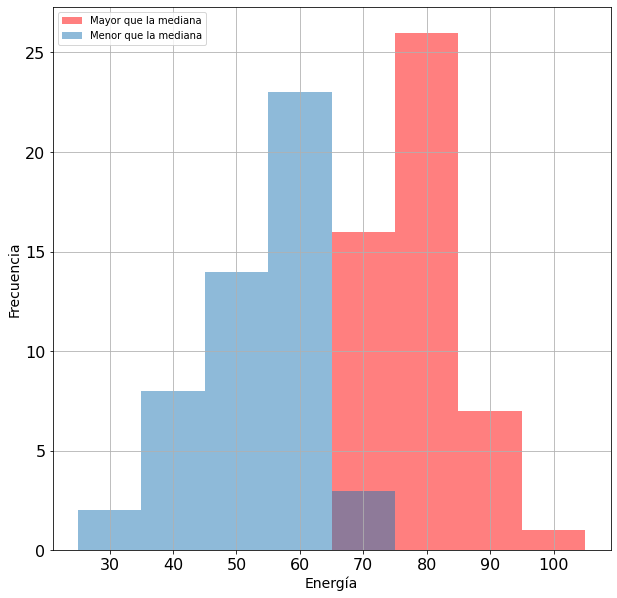

In [7]:
bottom_en = df[df["energy"] < df["energy"].median()]["energy"]
top_en = df[df["energy"] > df["energy"].median()]["energy"]

fig, ax = plt.subplots()

top_en.hist(ax=ax, bins=[65, 75, 85, 95, 105], color="red", figsize=(10, 10),
                      xlabelsize=16, ylabelsize=16, label="Mayor que la mediana", alpha=0.5)
bottom_en.hist(ax=ax, bins=[25, 35, 45, 55, 65, 75], label="Menor que la mediana", alpha=0.5)

plt.xlabel("Energía", fontsize=14)
plt.ylabel("Frecuencia", fontsize=14)
plt.legend()

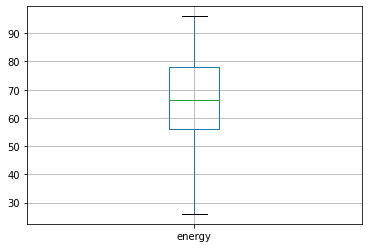

In [8]:
df.boxplot(column=["energy"])

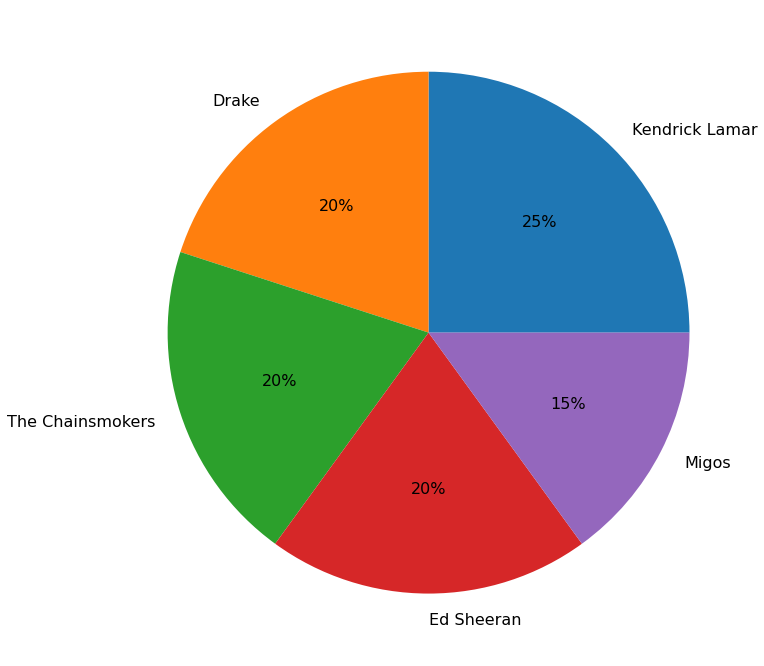

In [9]:
artistas = df['artist'].value_counts()
top_artistas = artistas.nlargest(5)
top_artistas.rename("").plot.pie(autopct='%i%%', figsize=(12, 12), fontsize=16)

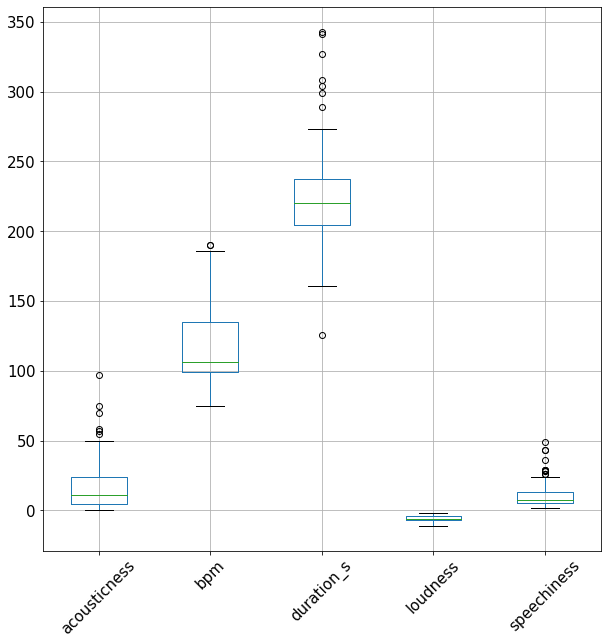

In [46]:
cols = ["acousticness", "bpm", "duration_s", "loudness", "speechiness"]
df.boxplot(cols, figsize=(10, 10), fontsize=15, rot=45)